# Calculate Moon Coordinates 

### <span style="color:red; font-family:Georgia;">Robert Cameron, May 2017</span>

Based on the equations at:
http://www.stargazing.net/kepler/moon2.html
and
http://www.stjarnhimlen.se/comp/ppcomp.html 

In [ ]:
'   definitions and functions
DEFDBL A-Z
pr$ = "####.###"
pr2$ = "#########.######"
pi = 4 * ATN(1)
tpi = 2 * pi
twopi = tpi
degs = 180 / pi
rads = pi / 180
'
'   Get the days to Dec 31st 0h 2000 - note, this is NOT same
'   as J2000
'   h is UT in decimal hours
'   FNday only works between 1901 to 2099 - see Meeus chapter 7
'
DEF FNday (y, m, d, h) = 367 * y - 7 * (y + (m + 9) \ 12) \ 4 + 275 * m \ 9 + d - 730530 + h /
24
'
'   define atn2
'
'   the atn2 function below returns an angle in the range 0 to two pi
'   depending on the signs of x and y.
'
DEF FNatn2 (y, x)
	a = ATN(y / x)
	IF x < 0 THEN a = a + pi
	IF (y < 0) AND (x > 0) THEN a = a + tpi
	FNatn2 = a
END DEF
'
'   the function below returns the true integer part,
'   even for negative numbers
'
DEF FNipart (x) = SGN(x) * INT(ABS(x))
'
'   the function below returns an angle in the range
'   0 to two pi
'
DEF FNrange (x)
	b = x / tpi
	a = tpi * (b - FNipart(b))
	IF a < 0 THEN a = tpi + a
	FNrange = a
END DEF


In [ ]:
'
'    get the time (strictly TDT, but UT will do) and date
'
INPUT "  year  : ", y
INPUT "  month : ", m
INPUT "  day   : ", day
INPUT "hour UT : ", h
INPUT " minute : ", mins
h = h + mins / 60
d = FNday(y, m, day, h)
PRINT "    days : "; d


In [ ]:
'   moon elements
Nm = FNrange((125.1228 - .0529538083# * d) * rads)
im = 5.1454 * rads
wm = FNrange((318.0634 + .1643573223# * d) * rads)
am = 60.2666  '(Earth radii)
ecm = .0549
Mm = FNrange((115.3654 + 13.0649929509# * d) * rads)
'   sun elements
Ns = 0!
isun = 0!
ws = FNrange((282.9404 + 4.70935E-05 * d) * rads)
asun = 1!        '(AU)
ecs = .016709 - 1.151E-09 * d
Ms = FNrange((356.047 + .9856002585# * d) * rads)
'position of Sun
'Es = Ms + Es * SIN(Ms) * (1! + ecs * COS(Ms))
'xv = COS(Es) - ecs
'yv = SQR(1! - ecs * ecs) * SIN(Es)
'vs = FNatn2(yv, xv)
'rs = SQR(xv * xv + yv * yv)
'lonsun = vs + ws
'xs = rs * COS(lonsun)
'ys = rs * SIN(lonsun)
'xe = xs
'ye = ys * COS(ecl)
''ze = ys * SIN(ecl)
'ras = FNatn2(ye, xe)
'decs = FNatn2(ze, sqr(xe * xe + ye * ye))
'   position of Moon
Em = Mm + ecm * SIN(Mm) * (1! + ecm * COS(Mm))
xv = am * (COS(Em) - ecm)
yv = am * (SQR(1! - ecm * ecm) * SIN(Em))
vm = FNatn2(yv, xv)
rm = SQR(xv * xv + yv * yv)
xh = rm * (COS(Nm) * COS(vm + wm) - SIN(Nm) * SIN(vm + wm) * COS(im))
yh = rm * (SIN(Nm) * COS(vm + wm) + COS(Nm) * SIN(vm + wm) * COS(im))
zh = rm * (SIN(vm + wm) * SIN(im))
'   moons geocentric long and lat
lon = FNatn2(yh, xh)
lat = FNatn2(zh, SQR(xh * xh + yh * yh))
'   perturbations
'   first calculate arguments below, which should be in radians
'Ms, Mm             Mean Anomaly of the Sun and the Moon
'Nm                 Longitude of the Moon's node
'ws, wm             Argument of perihelion for the Sun and the Moon
Ls = Ms + ws       'Mean Longitude of the Sun  (Ns=0)
Lm = Mm + wm + Nm  'Mean longitude of the Moon
dm = Lm - Ls        'Mean elongation of the Moon
F = Lm - Nm        'Argument of latitude for the Moon
' then add the following terms to the longitude
' note amplitudes are in degrees, convert at end
dlon = -1.274 * SIN(Mm - 2 * dm)        '(the Evection)
dlon = dlon + .658 * SIN(2 * dm)        '(the Variation)
dlon = dlon - .186 * SIN(Ms)            '(the Yearly Equation)
dlon = dlon - .059 * SIN(2 * Mm - 2 * dm)
dlon = dlon - .057 * SIN(Mm - 2 * dm + Ms)
dlon = dlon + .053 * SIN(Mm + 2 * dm)
dlon = dlon + .046 * SIN(2 * dm - Ms)
dlon = dlon + .041 * SIN(Mm - Ms)
dlon = dlon - .035 * SIN(dm)            '(the Parallactic Equation)
dlon = dlon - .031 * SIN(Mm + Ms)
dlon = dlon - .015 * SIN(2 * F - 2 * dm)
dlon = dlon + .011 * SIN(Mm - 4 * dm)
lon = dlon * rads + lon
'   latitude terms
dlat = -.173 * SIN(F - 2 * dm)
dlat = dlat - .055 * SIN(Mm - F - 2 * dm)
dlat = dlat - .046 * SIN(Mm + F - 2 * dm)
dlat = dlat + .033 * SIN(F + 2 * dm)
dlat = dlat + .017 * SIN(2 * Mm + F)
lat = dlat * rads + lat
'   distance terms earth radii
rm = rm - .58 * COS(Mm - 2 * dm)
rm = rm - .46 * COS(2 * dm)
'   next find the cartesian coordinates
'   of the geocentric lunar position
xg = rm * COS(lon) * COS(lat)
yg = rm * SIN(lon) * COS(lat)
zg = rm * SIN(lat)
'   rotate to equatorial coords
'   obliquity of ecliptic of date
ecl = (23.4393 - 3.563E-07 * d) * rads
xe = xg
ye = yg * COS(ecl) - zg * SIN(ecl)
ze = yg * SIN(ecl) + zg * COS(ecl)
'   geocentric RA and Dec
ra = FNatn2(ye, xe)
dec = ATN(ze / SQR(xe * xe + ye * ye))
PRINT USING pr$; ra * degs / 15
PRINT USING pr$; dec * degs
END

In [15]:
# specify the UTC time for the Moon position/coordinate calculations
start = "1991-05-19 15:00:00"
timezone = "CEST"

In [16]:
year = 1991
month = 5
day = 19
hour = 15
minute = 0
second = 0

In [17]:
hms = hour + minute/60.0 + second/3600.0

# convert input time to UTC

ut = hms - 2.0

In [18]:
d = 367*year - 7 * ( year + (month+9)//12 ) // 4 + 275*month//9 + day - 730530

In [19]:
d -= ut/24.0
d

-3148.5416666666665

In [20]:
import numpy as np
from math import *
%matplotlib inline
import matplotlib as plt
import sys
import datetime as dt

In [ ]:
# Convert input time to UTC

In [ ]:
plt.rc('figure', figsize = [16, 12])
plt.rc('font', size = 16)

In [24]:
(y0,m0,d0) = map(int, start.split("-"))
jd0 = jday(y0,m0,d0,0,0,0)
doy0 = jd0 - jday(y0,1,0,0,0,0)
(y1,m1,d1) = map(int, stop.split("-"))
ndays = int(jday(y1,m1,d1,0,0,0)  - jd0)
(y0, doy0, ndays)

(2016, 183.0, 6)

In [25]:
oformat = "%4d %02d %02d %02d %02d %02d %12.5f %12.6f %12.6f %12.6f %8.3f\n"
fo = open("beta_"+today+".txt", "w")
fdoypl = []
betapl = []
for day in range(ndays):
    for hour in range(24):
# add a small amount to the day number to ensure it is always a fraction of a second past the hour
        dinc = day + hour/24.0 + 1.0e-9
        jd = jd0 + dinc
        fdoy = doy0 + dinc
        (y,mon,d,h,m,s) = invjday(jd)    # need jd for the sun ephemeris
        s = int(s)
        fdoypl.append(fdoy)
        pos, vel = satellite.propagate(y,mon,d,h,m,s)  # this is the key line to specify the date
        pole = np.cross(pos,vel)
        polelen = np.linalg.norm(pole)
# calculate sun coordinates
        n = jd - 2451545.0
        L = (280.460 + 0.9856474 * n) % 360
        g = radians((357.528 + 0.9856003 * n) % 360)
        lamda = radians(L + 1.915 * sin(g) + 0.020 * sin(2*g))
        epsilon = radians(23.439 - 0.0000004 * n)
        Xsun = cos(lamda)
        Ysun = cos(epsilon) * sin(lamda)
        Zsun = sin(epsilon) * sin(lamda)
        dotprod = np.dot([Xsun,Ysun,Zsun], pole)
        beta = degrees(np.arcsin(dotprod/polelen))
        betapl.append(beta)
        fo.write(oformat % (y, mon, d, h, m, s, fdoy, pos[0], pos[1], pos[2], beta))
fo.close()

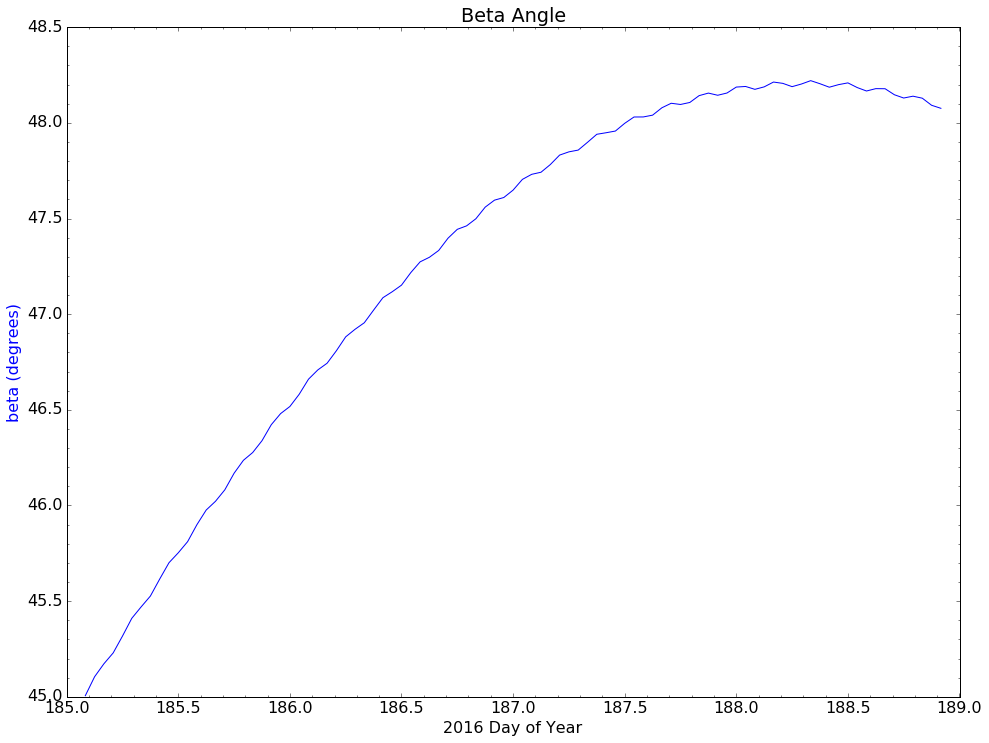

In [26]:
#rcParams['figure.figsize'] = 12, 8
#pylab.ylim(-50, 50)
#pylab.xlim(doy0, doy0+ndays)
def plot_beta(begin, end):
    pylab.minorticks_on()
    pylab.xlabel(str(y0)+' Day of Year')
    pylab.ylabel('beta (degrees)', color='b')
    pylab.title("Beta Angle")
    pylab.plot(fdoypl[begin:end], betapl[begin:end], label = 'Beta angle')
#    pylab.plot([fdoypl[begin],fdoypl[end-1]],[0,0],'k')
#    pylab.plot([fdoypl[begin],fdoypl[end-1]],[45,45],'r')
#    pylab.plot([fdoypl[begin],fdoypl[end-1]],[-45,-45],'r')
#    pylab.legend(loc='best',fontsize=12)
interact(plot_beta, begin=(0, ndays*24-1), end=(1, ndays*24-1))

In [27]:
savefig('beta_'+today+'.png')

NameError: name 'savefig' is not defined